In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
classification_parquet = '/content/gdrive/MyDrive/Colab Notebooks/classification_parquet'

In [4]:
df = pd.read_parquet(classification_parquet)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748833 entries, 0 to 3748832
Data columns (total 10 columns):
 #   Column                Dtype
---  ------                -----
 0   num_of_prev_attempts  int16
 1   studied_credits       int16
 2   date_registration     int16
 3   sum_click             int16
 4   date_assessment       int16
 5   weight                int16
 6   score                 int64
 7   assessment_type_CMA   uint8
 8   assessment_type_Exam  uint8
 9   assessment_type_TMA   uint8
dtypes: int16(6), int64(1), uint8(3)
memory usage: 82.2 MB


In [6]:
df.head()

,num_of_prev_attempts,studied_credits,date_registration,sum_click,date_assessment,weight,score,assessment_type_CMA,assessment_type_Exam,assessment_type_TMA
0,0,240,-159,98,19,10,7,0,0,1
1,0,240,-159,98,54,20,8,0,0,1
2,0,240,-159,98,117,20,7,0,0,1
3,0,240,-159,98,166,20,8,0,0,1
4,0,240,-159,98,215,30,8,0,0,1


In [33]:
num_cols = ['num_of_prev_attempts','score']
for i in num_cols:
    df[i] = df[i].astype('int8')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748833 entries, 0 to 3748832
Data columns (total 10 columns):
 #   Column                Dtype
---  ------                -----
 0   num_of_prev_attempts  int8 
 1   studied_credits       int16
 2   date_registration     int16
 3   sum_click             int16
 4   date_assessment       int16
 5   weight                int16
 6   score                 int8 
 7   assessment_type_CMA   uint8
 8   assessment_type_Exam  uint8
 9   assessment_type_TMA   uint8
dtypes: int16(5), int8(2), uint8(3)
memory usage: 53.6 MB


In [9]:
df.sample(10)

,num_of_prev_attempts,studied_credits,date_registration,sum_click,date_assessment,weight,score,assessment_type_CMA,assessment_type_Exam,assessment_type_TMA
2155403,0,60,-21,45,222,0,9,1,0,0
2566083,0,60,-29,3,96,25,9,0,0,1
2931192,0,60,-17,122,227,0,7,1,0,0
3732052,0,30,-85,19,124,0,6,0,0,1
971459,0,150,-88,32,18,2,6,1,0,0
2479461,0,120,-29,54,236,0,8,1,0,0
3063370,0,60,-67,64,227,0,8,1,0,0
3622636,0,60,-4,115,241,0,7,1,0,0
910861,0,120,-60,22,207,100,4,0,1,0
2269742,0,130,-73,77,222,0,7,1,0,0


In [10]:
df['score'].unique()

array([7, 8, 6, 5, 2, 3, 4, 1, 9, 0], dtype=int8)

In [34]:
targets = []
targets=[str(i) for i in range(10)]
targets

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [12]:
df.isna().sum().sum()

0

In [13]:
df.shape

(3748833, 10)

In [14]:
y = df['score']
X = df.drop(['score'],axis = 1)

In [15]:
print(X,y)
print(X.shape,y.shape)

         num_of_prev_attempts  ...  assessment_type_TMA
0                           0  ...                    1
1                           0  ...                    1
2                           0  ...                    1
3                           0  ...                    1
4                           0  ...                    1
...                       ...  ...                  ...
3748828                     0  ...                    1
3748829                     0  ...                    1
3748830                     0  ...                    1
3748831                     0  ...                    1
3748832                     0  ...                    0

[3748833 rows x 9 columns] 0          7
1          8
2          7
3          8
4          8
          ..
3748828    7
3748829    5
3748830    7
3748831    5
3748832    9
Name: score, Length: 3748833, dtype: int8
(3748833, 9) (3748833,)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Classification Models

####XGBoost final

In [17]:
X_train

,num_of_prev_attempts,studied_credits,date_registration,sum_click,date_assessment,weight,assessment_type_CMA,assessment_type_Exam,assessment_type_TMA
18373,0,60,-52,36,166,20,0,0,1
3070497,0,60,-28,27,129,25,0,0,1
2933290,0,60,-40,5,171,25,0,0,1
2882892,0,90,-25,115,227,0,1,0,0
320739,0,60,-36,15,96,18,0,0,1
...,...,...,...,...,...,...,...,...,...
2356330,1,150,-25,7,222,0,1,0,0
3511566,0,60,-60,57,94,25,0,0,1
2229084,0,180,-106,62,222,0,1,0,0
2768307,0,90,-53,23,173,25,0,0,1


In [18]:
X_test

,num_of_prev_attempts,studied_credits,date_registration,sum_click,date_assessment,weight,assessment_type_CMA,assessment_type_Exam,assessment_type_TMA
3709528,0,30,-10,6,166,0,0,0,1
1007176,0,60,-155,65,32,9,0,0,1
47851,0,60,-45,9,19,10,0,0,1
3179855,0,60,-144,143,241,0,1,0,0
732570,0,210,-62,18,200,100,0,1,0
...,...,...,...,...,...,...,...,...,...
3044879,0,60,-99,45,52,12,0,0,1
3183473,0,60,-28,38,199,25,0,0,1
721203,0,90,-29,11,151,22,0,0,1
1736973,1,60,-91,4,41,10,0,0,1


In [19]:
y_train

18373      6
3070497    5
2933290    9
2882892    9
320739     5
          ..
2356330    7
3511566    9
2229084    8
2768307    9
2219110    8
Name: score, Length: 2511718, dtype: int8

In [20]:
y_test

3709528    6
1007176    9
47851      8
3179855    9
732570     5
          ..
3044879    8
3183473    7
721203     7
1736973    5
988446     8
Name: score, Length: 1237115, dtype: int8

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

import xgboost as xgb


# Init classifier
xgb_cl = xgb.XGBClassifier()


# Fit
xgb_cl.fit(scaler.fit_transform(X_train), y_train)

# Predict
preds = xgb_cl.predict(scaler.fit_transform(X_test))
accuracy_score(y_test, preds)

0.3118578305169689

In [22]:
print(preds)

[7 9 7 ... 9 7 9]


In [23]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, preds, target_names = targets))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.46      0.10      0.17      4847
           1       0.00      0.00      0.00      7959
           2       0.00      0.00      0.00     14585
           3       0.00      0.00      0.00     31095
           4       0.31      0.00      0.00     50963
           5       0.25      0.02      0.04    107742
           6       0.29      0.03      0.05    171261
           7       0.28      0.24      0.26    285374
           8       0.30      0.68      0.42    304588
           9       0.38      0.40      0.39    258701

    accuracy                           0.31   1237115
   macro avg       0.23      0.15      0.13   1237115
weighted avg       0.29      0.31      0.25   1237115



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.metrics import log_loss 
y_prob = xgb_cl.predict_proba(X_test)
log_loss(y_test, y_prob)

1.71694


In [25]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, preds)

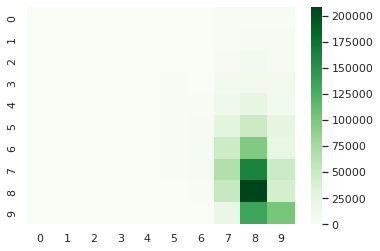

In [26]:

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(c, cmap="Greens")